<a href="https://colab.research.google.com/github/phurisk/BSC_DPDM23/blob/main/Understanding_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd


In [26]:
csv_data_path = '/content/drive/MyDrive/BSC_DPDM23/File/customer_shopping_data.csv'


shopping_data = pd.read_csv(csv_data_path)


In [27]:
shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


TypeError: ignored

#Link google sheet

In [ ]:
from google.colab import auth

# Authenticate with Google Sheets API
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
gsht = gc.open_by_key('1mQlcdVxc9ewLjhTWjhaksm3mg9yFjbB4AhY_SIx0oP4')

In [ ]:
worksheet2 = gsht.worksheet('มิ.ย. 2563')
rows = worksheet2.get_all_values()
# data_from_gsheets = pd.DataFrame.from_records(rows)
header = rows[2]
data = rows[3:]

data_from_gsheets = pd.DataFrame(data, columns=header)


In [ ]:
data_from_gsheets

# Basic stat

In [30]:
unique_payment_methods = shopping_data['payment_method'].unique()

print("Unique Payment Methods:")
print(unique_payment_methods)


Unique Payment Methods:
['Credit Card' 'Debit Card' 'Cash']


In [32]:
payment_method_counts = shopping_data['payment_method'].value_counts()

print("Payment Method Counts:")
print(payment_method_counts)


Payment Method Counts:
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [ ]:
set()

average puchase amount use of customer age above 40 year?

In [35]:

shopping_data['age'] = pd.to_numeric(shopping_data['age'])

above_40_df = shopping_data[shopping_data['age'] > 40]

average_purchase_amount = above_40_df['price'].mean()

print("Average Purchase Amount for Customers above 40 years old:", average_purchase_amount)


Average Purchase Amount for Customers above 40 years old: 690.8531357514456


#Visualization

In [21]:
from matplotlib import pyplot as plt

#Histogram

#### Branches distibution

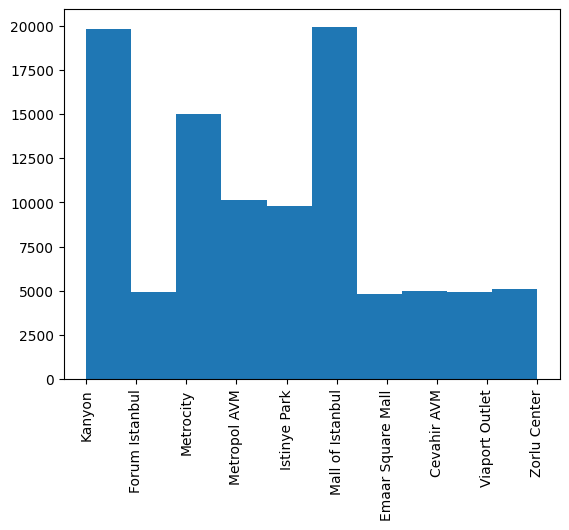

In [50]:
histoutput = plt.hist(shopping_data['shopping_mall'])
tickhist = plt.xticks(rotation='vertical');

In [51]:
histoutput[0]

array([19823.,  4947., 15011., 10161.,  9781., 19943.,  4811.,  4991.,
        4914.,  5075.])

In [52]:
tickhist[-1]

[Text(0, 0, 'Kanyon'),
 Text(1, 0, 'Forum Istanbul'),
 Text(2, 0, 'Metrocity'),
 Text(3, 0, 'Metropol AVM'),
 Text(4, 0, 'Istinye Park'),
 Text(5, 0, 'Mall of Istanbul'),
 Text(6, 0, 'Emaar Square Mall'),
 Text(7, 0, 'Cevahir AVM'),
 Text(8, 0, 'Viaport Outlet'),
 Text(9, 0, 'Zorlu Center')]

In [ ]:
import matplotlib.pyplot as plt

mall_counts = shopping_data['shopping_mall'].value_counts()

plt.bar(mall_counts.index, mall_counts)


for idx, value in enumerate(mall_counts):
    plt.text(idx, value + 0.1, str(value), ha='center', va='bottom', rotation=45)


plt.xlabel('Shopping Mall')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Shopping Mall')

plt.xticks(rotation='vertical')


plt.show()


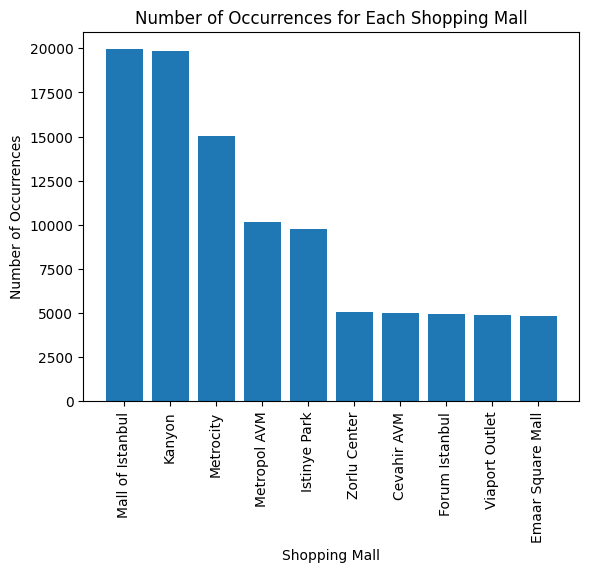

In [42]:
mall_counts = shopping_data['shopping_mall'].value_counts()
plt.bar(mall_counts.index, mall_counts)

plt.xlabel('Shopping Mall')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Shopping Mall')

plt.xticks(rotation='vertical')

plt.show()


#Scatter

#### is there a trend in age vs price?

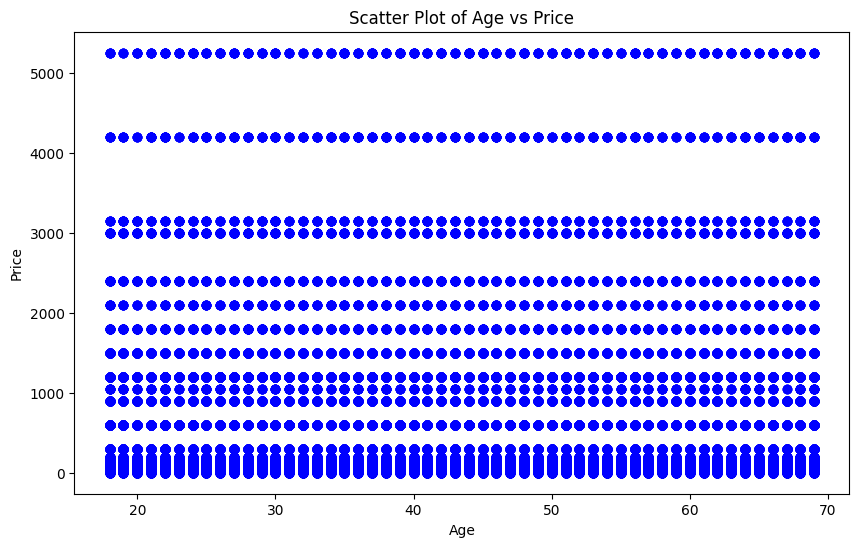

In [59]:

plt.figure(figsize=(10, 6))
plt.scatter(shopping_data['age'], shopping_data['price'], c='blue', alpha=0.5)  # 'c' is for color, 'alpha' is for transparency

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter Plot of Age vs Price')

# Show the plot
plt.show()


#### is there a trend in age vs quantity

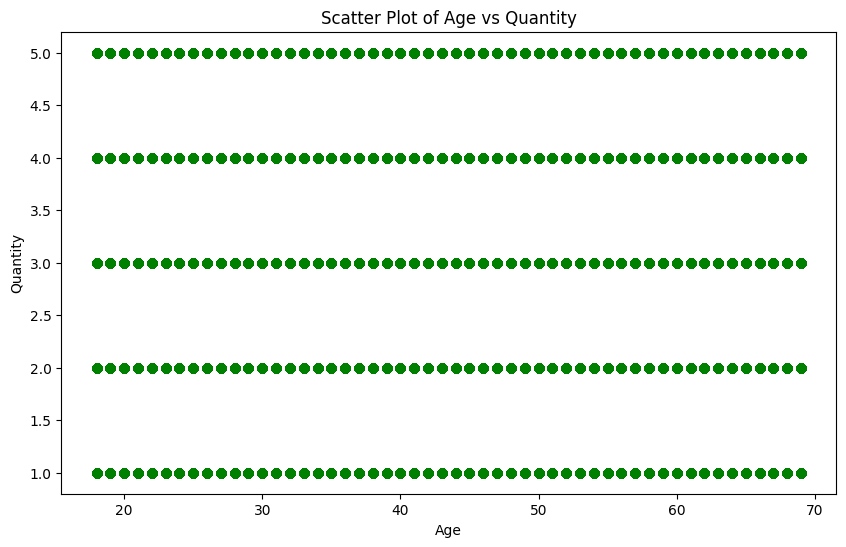

In [61]:


plt.figure(figsize=(10, 6))
plt.scatter(shopping_data['age'], shopping_data['quantity'], c='green', alpha=0.5)  # 'c' is for color, 'alpha' is for transparency

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Scatter Plot of Age vs Quantity')

# Show the plot
plt.show()


#### price vs quantity

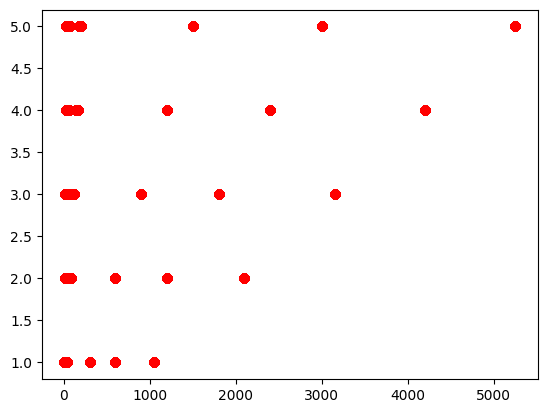

In [63]:
plt.scatter(shopping_data['price'], shopping_data['quantity'], c='red', alpha=0.5)


#Box plot

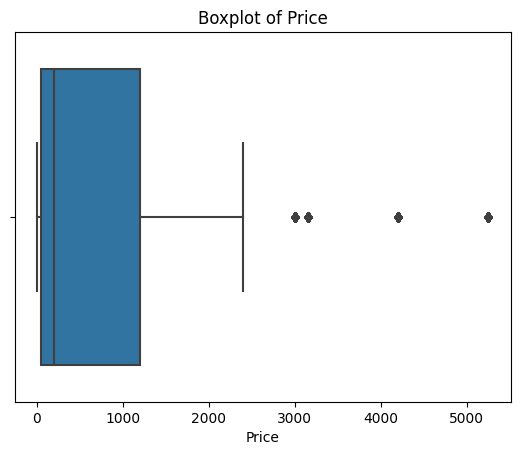

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='price', data=shopping_data)

plt.xlabel('Price')
plt.title('Boxplot of Price')

plt.show()


Outlier Values: [3000.85, 3000.85, 5250.0, 4200.0, 5250.0, 3000.85, 3000.85, 3000.85, 3150.0, 3000.85, 3150.0, 3150.0, 3000.85, 3000.85, 3150.0, 3150.0, 5250.0, 3000.85, 3000.85, 5250.0, 3150.0, 3000.85, 4200.0, 3150.0, 4200.0, 3000.85, 3000.85, 5250.0, 4200.0, 5250.0, 3000.85, 4200.0, 3150.0, 4200.0, 3000.85, 3000.85, 5250.0, 3150.0, 4200.0, 4200.0, 3150.0, 4200.0, 5250.0, 4200.0, 3000.85, 3000.85, 5250.0, 5250.0, 5250.0, 3000.85, 4200.0, 3000.85, 5250.0, 4200.0, 3000.85, 3000.85, 3150.0, 3000.85, 4200.0, 3150.0, 3000.85, 4200.0, 4200.0, 5250.0, 3000.85, 3150.0, 3150.0, 3000.85, 5250.0, 5250.0, 3000.85, 3000.85, 3000.85, 3000.85, 3000.85, 3000.85, 3150.0, 5250.0, 3000.85, 3150.0, 5250.0, 4200.0, 4200.0, 4200.0, 5250.0, 3000.85, 4200.0, 4200.0, 5250.0, 3000.85, 5250.0, 5250.0, 5250.0, 3150.0, 4200.0, 3150.0, 3150.0, 3000.85, 3000.85, 3000.85, 3000.85, 3000.85, 3000.85, 3150.0, 4200.0, 5250.0, 3000.85, 4200.0, 3000.85, 3000.85, 3000.85, 3000.85, 5250.0, 5250.0, 5250.0, 3000.85, 3150.0, 

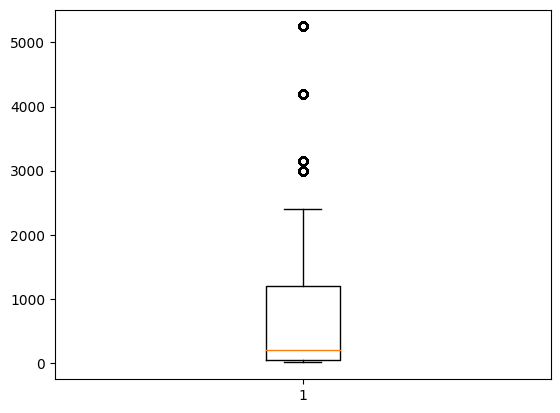

In [67]:
import matplotlib.pyplot as plt

boxplot = plt.boxplot(shopping_data['price'])
outlier_values = [flier.get_ydata() for flier in boxplot['fliers']]
flat_outliers = [item for sublist in outlier_values for item in sublist]

print("Outlier Values:", flat_outliers)


Outlier Counts:
Value: 3000.85, Count: 2013
Value: 5250.0, Count: 1001
Value: 4200.0, Count: 1001
Value: 3150.0, Count: 1009


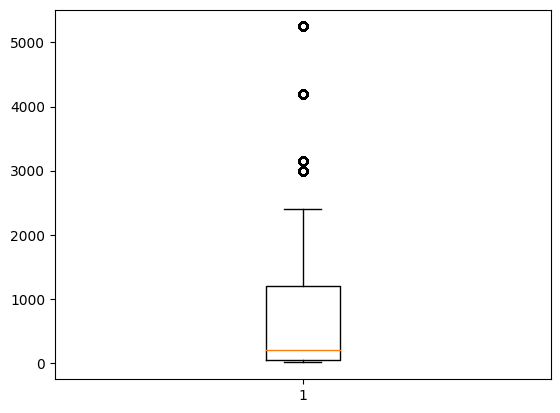

In [66]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named shopping_data
boxplot = plt.boxplot(shopping_data['price'])

# Get the values of outliers
outlier_values = [flier.get_ydata() for flier in boxplot['fliers']]

# Flatten the list of outlier values
flat_outliers = [item for sublist in outlier_values for item in sublist]

# Count the occurrences of each outlier value
outlier_counts = Counter(flat_outliers)

# Print the counts of outlier values
print("Outlier Counts:")
for value, count in outlier_counts.items():
    print(f"Value: {value}, Count: {count}")


#Pie Chart

#### ration of male and female  customer

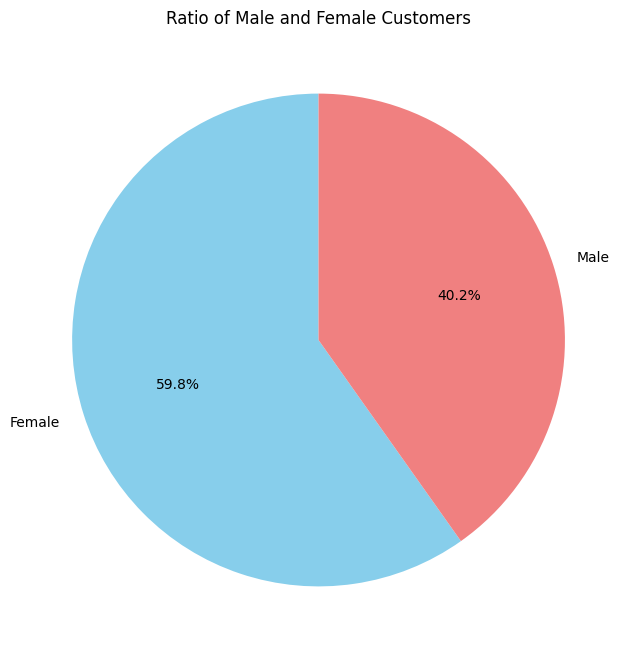

In [77]:

gender_counts = shopping_data['gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Ratio of Male and Female Customers')

# Show the plot
plt.show()


#barchart

#### เปรียบเทียบชนิดสินค้าที่ซื้อในแต่บะ shopping mall แบบภาพรวมของแต่ละ shopping mall

<Figure size 1200x1000 with 0 Axes>

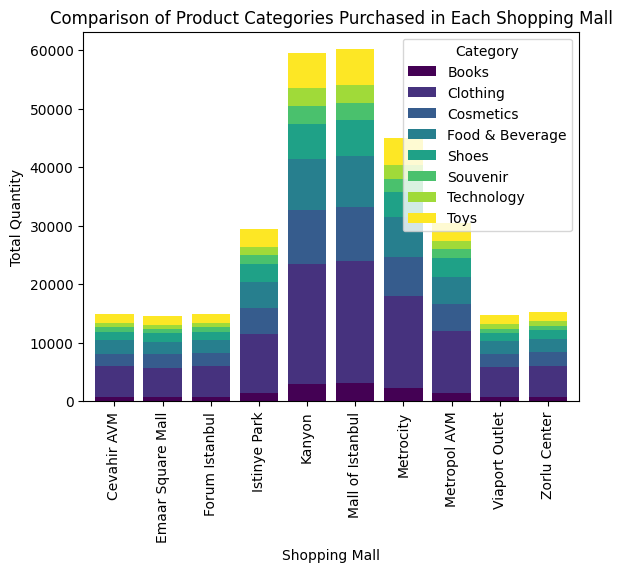

In [90]:
import matplotlib.pyplot as plt

mall_category_quantity = shopping_data.groupby(['shopping_mall', 'category'])['quantity'].sum().unstack()

 #ขนาด
plt.figure(figsize=(12, 10))

# Plot stacked bar chart
mall_category_quantity.plot(kind='bar', stacked=True, width=0.8, colormap='viridis')

# label ต่างๆ
plt.xlabel('Shopping Mall')
plt.ylabel('Total Quantity')
plt.title('Comparison of Product Categories Purchased in Each Shopping Mall')
plt.legend(title='Category', loc='upper right')

# โชว์ plot
plt.show()


# group barchart

#### เปรียบเทียบปริมาณชนิดสินค้ในแต่ละ shopping mall เป็นราย shopping mall

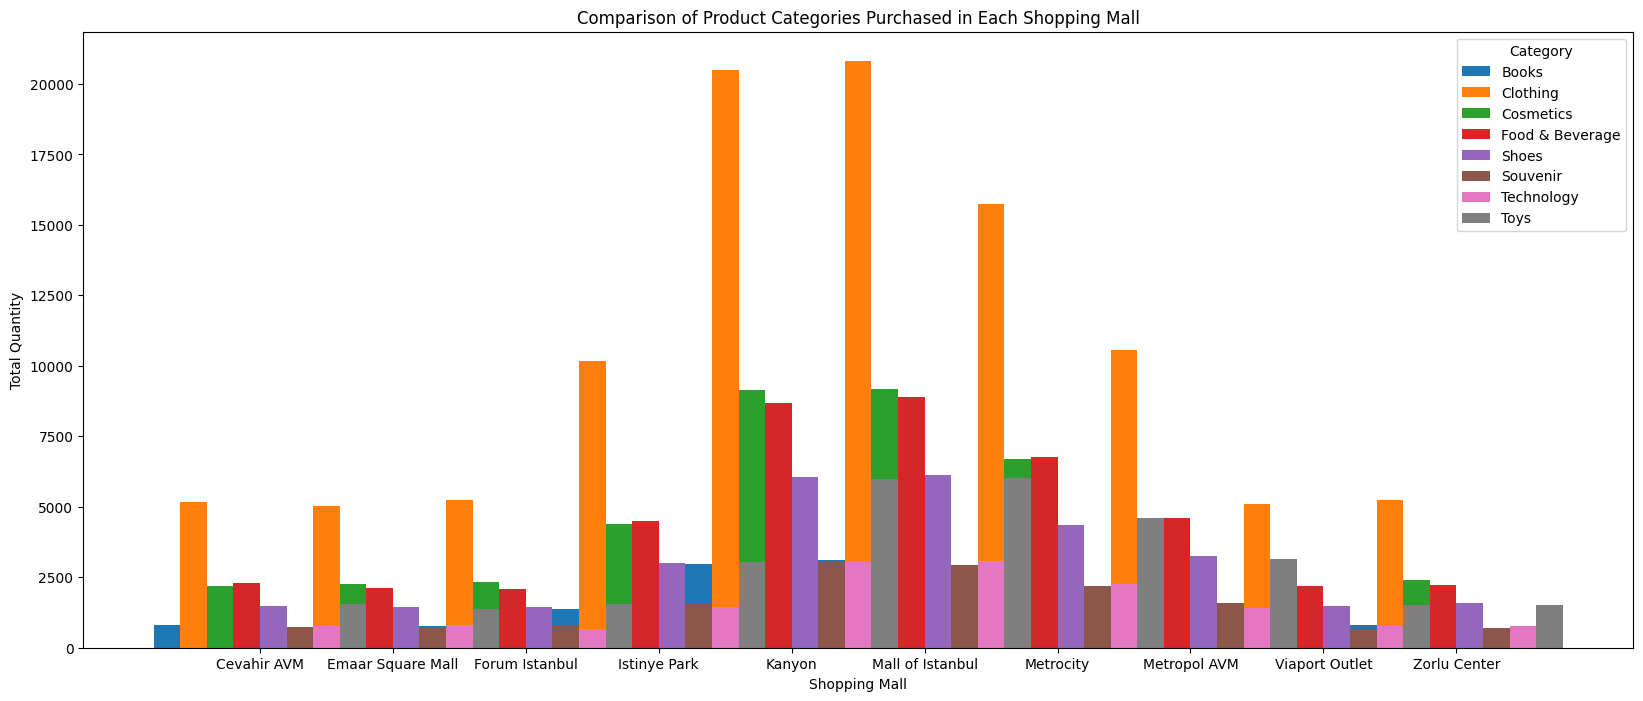

In [87]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named shopping_data
# Group by shopping mall and category, then sum the quantity for each group
mall_category_quantity = shopping_data.groupby(['shopping_mall', 'category'])['quantity'].sum().reset_index()

# Get unique categories for the x-axis labels
categories = mall_category_quantity['category'].unique()

# Set the width of the bars
bar_width = 0.2

# Set a larger figure size
plt.figure(figsize=(20, 8))

# Create a bar chart for each category
for i, category in enumerate(categories):
    category_data = mall_category_quantity[mall_category_quantity['category'] == category]
    positions = [pos + i * bar_width for pos in range(len(category_data))]
    plt.bar(positions, category_data['quantity'], width=bar_width, label=category)

# Set x-axis labels and ticks
mall_labels = mall_category_quantity['shopping_mall'].unique()
plt.xticks([pos + (len(categories) - 1) * bar_width / 2 for pos in range(len(mall_labels))], mall_labels)
plt.xlabel('Shopping Mall')
plt.ylabel('Total Quantity')
plt.title('Comparison of Product Categories Purchased in Each Shopping Mall')
plt.legend(title='Category', loc='upper right')

# Show the plot
plt.show()


#Distance - Similarity

##z-score